### Install necessary packages for this project

In [2]:
%pip install numpy
%pip install scikit-learn
%pip install matplotlib
%pip install seaborn
%pip install torch

You should consider upgrading via the '/Users/raghulgopal/Desktop/MLOPs Dev/.venv/bin/python -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.
You should consider upgrading via the '/Users/raghulgopal/Desktop/MLOPs Dev/.venv/bin/python -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.
You should consider upgrading via the '/Users/raghulgopal/Desktop/MLOPs Dev/.venv/bin/python -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.
You should consider upgrading via the '/Users/raghulgopal/Desktop/MLOPs Dev/.venv/bin/python -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.
You should consider upgrading via the '/Users/raghulgopal/Desktop/MLOPs Dev/.venv/bin/python -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [3]:
# --- IGNORE --- if parquet file import is working
%pip uninstall pandas -y
%pip install pyarrow
%pip install fastparquet
%pip install pandas
# Any one of the above two should work

Found existing installation: pandas 2.3.2
Uninstalling pandas-2.3.2:
  Successfully uninstalled pandas-2.3.2
Note: you may need to restart the kernel to use updated packages.
You should consider upgrading via the '/Users/raghulgopal/Desktop/MLOPs Dev/.venv/bin/python -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.
     |████████████████████████████████| 10.8 MB 3.4 MB/s eta 0:00:01
You should consider upgrading via the '/Users/raghulgopal/Desktop/MLOPs Dev/.venv/bin/python -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.
You should consider upgrading via the '/Users/raghulgopal/Desktop/MLOPs Dev/.venv/bin/python -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [5]:
# Read the parquet file
import pandas as pd
df = pd.read_parquet('/Users/raghulgopal/Desktop/MLOPs Dev/data/green_tripdata_2025-08.parquet')
df.head()

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,...,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge,cbd_congestion_fee
0,2,2025-08-01 00:33:57,2025-08-01 00:58:10,N,1.0,70,82,1.0,2.44,21.9,...,0.5,0.00,0.0,NaN,1.0,24.40,2.0,1.0,0.00,0.0
1,2,2025-08-01 00:01:00,2025-08-01 00:12:58,N,1.0,130,216,1.0,4.06,18.4,...,0.5,0.00,0.0,NaN,1.0,20.90,2.0,1.0,0.00,0.0
2,2,2025-08-01 00:11:02,2025-08-01 00:16:06,N,1.0,74,263,1.0,2.09,10.0,...,0.5,3.05,0.0,NaN,1.0,18.30,1.0,1.0,2.75,0.0
3,2,2025-08-01 00:44:09,2025-08-01 00:47:04,N,1.0,42,41,1.0,0.53,5.1,...,0.5,0.00,0.0,NaN,1.0,7.60,2.0,1.0,0.00,0.0
4,2,2025-08-01 00:57:06,2025-08-01 01:05:32,N,1.0,75,239,1.0,2.28,12.1,...,0.5,3.47,0.0,NaN,1.0,20.82,1.0,1.0,2.75,0.0


In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

### List of all Machine learning models which will be used in Prediction of Ride Duration

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.ensemble import RandomForestRegressor
#Install xgboost, and lightgbm using pip install xgboost
%pip install xgboost
%pip install lightgbm
import xgboost as xgb
import lightgbm as lgb

You should consider upgrading via the '/Users/raghulgopal/Desktop/MLOPs Dev/.venv/bin/python -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.
You should consider upgrading via the '/Users/raghulgopal/Desktop/MLOPs Dev/.venv/bin/python -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [8]:
# Let's understand what are all the columns present in the dataset
df.columns

Index(['VendorID', 'lpep_pickup_datetime', 'lpep_dropoff_datetime',
       'store_and_fwd_flag', 'RatecodeID', 'PULocationID', 'DOLocationID',
       'passenger_count', 'trip_distance', 'fare_amount', 'extra', 'mta_tax',
       'tip_amount', 'tolls_amount', 'ehail_fee', 'improvement_surcharge',
       'total_amount', 'payment_type', 'trip_type', 'congestion_surcharge',
       'cbd_congestion_fee'],
      dtype='object')

#### Insights on the dataset

- The dataset contains two columns namely pickup datetime, and dropoff datetime, where the difference will registered as the duration of the taxi driven.
- There are two location ids, namely PU Location ID, and Drop Location ID, which says, where the Pickup place is, and where the dropoff place is.
- There is a column, called trip distance, which can say, how much distance has been covered in the given trip duration time. 
- Total amount is the calculated field, which depends on fare_amount, extra, mta_tax, tip_amount, ehail_fee, improvement_surcharge respectively. It may/may not be depends on the trip distance, and trip duration

In [9]:
df['duration'] = df['lpep_dropoff_datetime'] - df['lpep_pickup_datetime']
df.duration = df.duration.apply(lambda td: td.total_seconds() / 60)

In [10]:
df

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,...,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge,cbd_congestion_fee,duration
0,2,2025-08-01 00:33:57,2025-08-01 00:58:10,N,1.0,70,82,1.0,2.44,21.90,...,0.00,0.0,NaN,1.0,24.40,2.0,1.0,0.00,0.00,24.216667
1,2,2025-08-01 00:01:00,2025-08-01 00:12:58,N,1.0,130,216,1.0,4.06,18.40,...,0.00,0.0,NaN,1.0,20.90,2.0,1.0,0.00,0.00,11.966667
2,2,2025-08-01 00:11:02,2025-08-01 00:16:06,N,1.0,74,263,1.0,2.09,10.00,...,3.05,0.0,NaN,1.0,18.30,1.0,1.0,2.75,0.00,5.066667
3,2,2025-08-01 00:44:09,2025-08-01 00:47:04,N,1.0,42,41,1.0,0.53,5.10,...,0.00,0.0,NaN,1.0,7.60,2.0,1.0,0.00,0.00,2.916667
4,2,2025-08-01 00:57:06,2025-08-01 01:05:32,N,1.0,75,239,1.0,2.28,12.10,...,3.47,0.0,NaN,1.0,20.82,1.0,1.0,2.75,0.00,8.433333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46301,2,2025-08-31 22:56:00,2025-08-31 23:16:00,None,NaN,49,224,NaN,4.12,23.06,...,4.21,0.0,NaN,1.0,32.27,NaN,NaN,NaN,0.75,20.000000
46302,6,2025-08-31 22:32:06,2025-08-31 22:51:08,None,NaN,70,95,NaN,3.89,2.90,...,0.00,0.0,NaN,0.3,16.00,NaN,NaN,NaN,0.00,19.033333
46303,2,2025-08-31 22:39:31,2025-08-31 23:00:00,None,NaN,112,224,NaN,4.89,24.63,...,3.56,0.0,NaN,1.0,33.19,NaN,NaN,NaN,0.75,20.483333
46304,2,2025-08-31 23:43:00,2025-09-01 00:03:00,None,NaN,74,32,NaN,8.37,28.81,...,0.00,0.0,NaN,1.0,30.31,NaN,NaN,NaN,0.00,20.000000


In [11]:
df = df[(df.duration >= 1) & (df.duration <= 60)] # Make sure that duration is between 1 and 60 minutes
df

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,...,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge,cbd_congestion_fee,duration
0,2,2025-08-01 00:33:57,2025-08-01 00:58:10,N,1.0,70,82,1.0,2.44,21.90,...,0.00,0.0,NaN,1.0,24.40,2.0,1.0,0.00,0.00,24.216667
1,2,2025-08-01 00:01:00,2025-08-01 00:12:58,N,1.0,130,216,1.0,4.06,18.40,...,0.00,0.0,NaN,1.0,20.90,2.0,1.0,0.00,0.00,11.966667
2,2,2025-08-01 00:11:02,2025-08-01 00:16:06,N,1.0,74,263,1.0,2.09,10.00,...,3.05,0.0,NaN,1.0,18.30,1.0,1.0,2.75,0.00,5.066667
3,2,2025-08-01 00:44:09,2025-08-01 00:47:04,N,1.0,42,41,1.0,0.53,5.10,...,0.00,0.0,NaN,1.0,7.60,2.0,1.0,0.00,0.00,2.916667
4,2,2025-08-01 00:57:06,2025-08-01 01:05:32,N,1.0,75,239,1.0,2.28,12.10,...,3.47,0.0,NaN,1.0,20.82,1.0,1.0,2.75,0.00,8.433333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46301,2,2025-08-31 22:56:00,2025-08-31 23:16:00,None,NaN,49,224,NaN,4.12,23.06,...,4.21,0.0,NaN,1.0,32.27,NaN,NaN,NaN,0.75,20.000000
46302,6,2025-08-31 22:32:06,2025-08-31 22:51:08,None,NaN,70,95,NaN,3.89,2.90,...,0.00,0.0,NaN,0.3,16.00,NaN,NaN,NaN,0.00,19.033333
46303,2,2025-08-31 22:39:31,2025-08-31 23:00:00,None,NaN,112,224,NaN,4.89,24.63,...,3.56,0.0,NaN,1.0,33.19,NaN,NaN,NaN,0.75,20.483333
46304,2,2025-08-31 23:43:00,2025-09-01 00:03:00,None,NaN,74,32,NaN,8.37,28.81,...,0.00,0.0,NaN,1.0,30.31,NaN,NaN,NaN,0.00,20.000000


### Use case 1 - Predict the Duration of the trip using Pick up Location, Drop off Location, and trip distance

In [12]:
categorical = ['PULocationID', 'DOLocationID']
numerical = ['trip_distance']
df[categorical] = df[categorical].astype(str)
train_dicts = df[categorical + numerical].to_dict(orient='records')
train_dicts

/var/folders/fc/rs0n1nb14hgc3v3qh9h2rvf40000gn/T/ipykernel_7178/1029847224.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[categorical] = df[categorical].astype(str)


[{'PULocationID': '70', 'DOLocationID': '82', 'trip_distance': 2.44},
 {'PULocationID': '130', 'DOLocationID': '216', 'trip_distance': 4.06},
 {'PULocationID': '74', 'DOLocationID': '263', 'trip_distance': 2.09},
 {'PULocationID': '42', 'DOLocationID': '41', 'trip_distance': 0.53},
 {'PULocationID': '75', 'DOLocationID': '239', 'trip_distance': 2.28},
 {'PULocationID': '83', 'DOLocationID': '129', 'trip_distance': 1.61},
 {'PULocationID': '74', 'DOLocationID': '238', 'trip_distance': 3.15},
 {'PULocationID': '75', 'DOLocationID': '236', 'trip_distance': 1.14},
 {'PULocationID': '74', 'DOLocationID': '42', 'trip_distance': 2.91},
 {'PULocationID': '92', 'DOLocationID': '92', 'trip_distance': 0.0},
 {'PULocationID': '82', 'DOLocationID': '129', 'trip_distance': 0.54},
 {'PULocationID': '106', 'DOLocationID': '118', 'trip_distance': 14.67},
 {'PULocationID': '74', 'DOLocationID': '236', 'trip_distance': 1.74},
 {'PULocationID': '130', 'DOLocationID': '121', 'trip_distance': 3.14},
 {'PULo

In [13]:
# Initialize the DictVectorizer to convert the dictionary to feature matrix
dv = DictVectorizer()
X_train = dv.fit_transform(train_dicts)
X_train.shape

(43692, 474)

In [14]:
target = 'duration'
y_train = df[target].values

In [15]:
models_to_train = {
    "LinearRegression": LinearRegression(),
    "Ridge": Ridge(alpha=1.0), #alpha is the regularization parameter - constant the multiples the L2 norm
    "Lasso": Lasso(alpha=0.1), #alpha is the regularization parameter - constant the multiples the L1 norm
    "ElasticNet": ElasticNet(), #alpha is the regularization parameter - constant the multiples the penalty terms.
    "RandomForestRegressor": RandomForestRegressor(),
    "XGBRegressor": xgb.XGBRegressor(objective='reg:squarederror',
                                     learning_rate=0.1),
    "LGBMRegressor": lgb.LGBMRegressor(learning_rate=0.1,
                                       objective='regression',
                                       boosting_type='gbdt') #default is gbdt
}

In [16]:
for model_name, model in models_to_train.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_train)
    rmse = mean_squared_error(y_train, y_pred)
    print(f"{model_name}: {rmse}")

LinearRegression: 65.87256516529146
Ridge: 65.57778767525849
Lasso: 94.65359922392551
ElasticNet: 107.68968302211202
RandomForestRegressor: 6.845980842291854
XGBRegressor: 26.665823692093937
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000185 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 857
[LightGBM] [Info] Number of data points in the train set: 43692, number of used features: 302
[LightGBM] [Info] Start training from score 15.887821
LGBMRegressor: 26.762855326573757


/Users/raghulgopal/Desktop/MLOPs Dev/.venv/lib/python3.9/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


In [17]:
# Huge Error - Let's try RMSE to normalize the error
from sklearn.metrics import root_mean_squared_error
model_predictions = {}
for model_name, model in models_to_train.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_train)
    model_predictions[model_name] = y_pred
    rmse = root_mean_squared_error(y_train, y_pred)
    print(f"{model_name}: {rmse}")

LinearRegression: 8.116191543161822
Ridge: 8.098011340771171
Lasso: 9.729008131558196
ElasticNet: 10.377363972710604
RandomForestRegressor: 2.613348423011277
XGBRegressor: 5.163896173636137
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000295 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 857
[LightGBM] [Info] Number of data points in the train set: 43692, number of used features: 302
[LightGBM] [Info] Start training from score 15.887821
LGBMRegressor: 5.173282838447339


/Users/raghulgopal/Desktop/MLOPs Dev/.venv/lib/python3.9/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


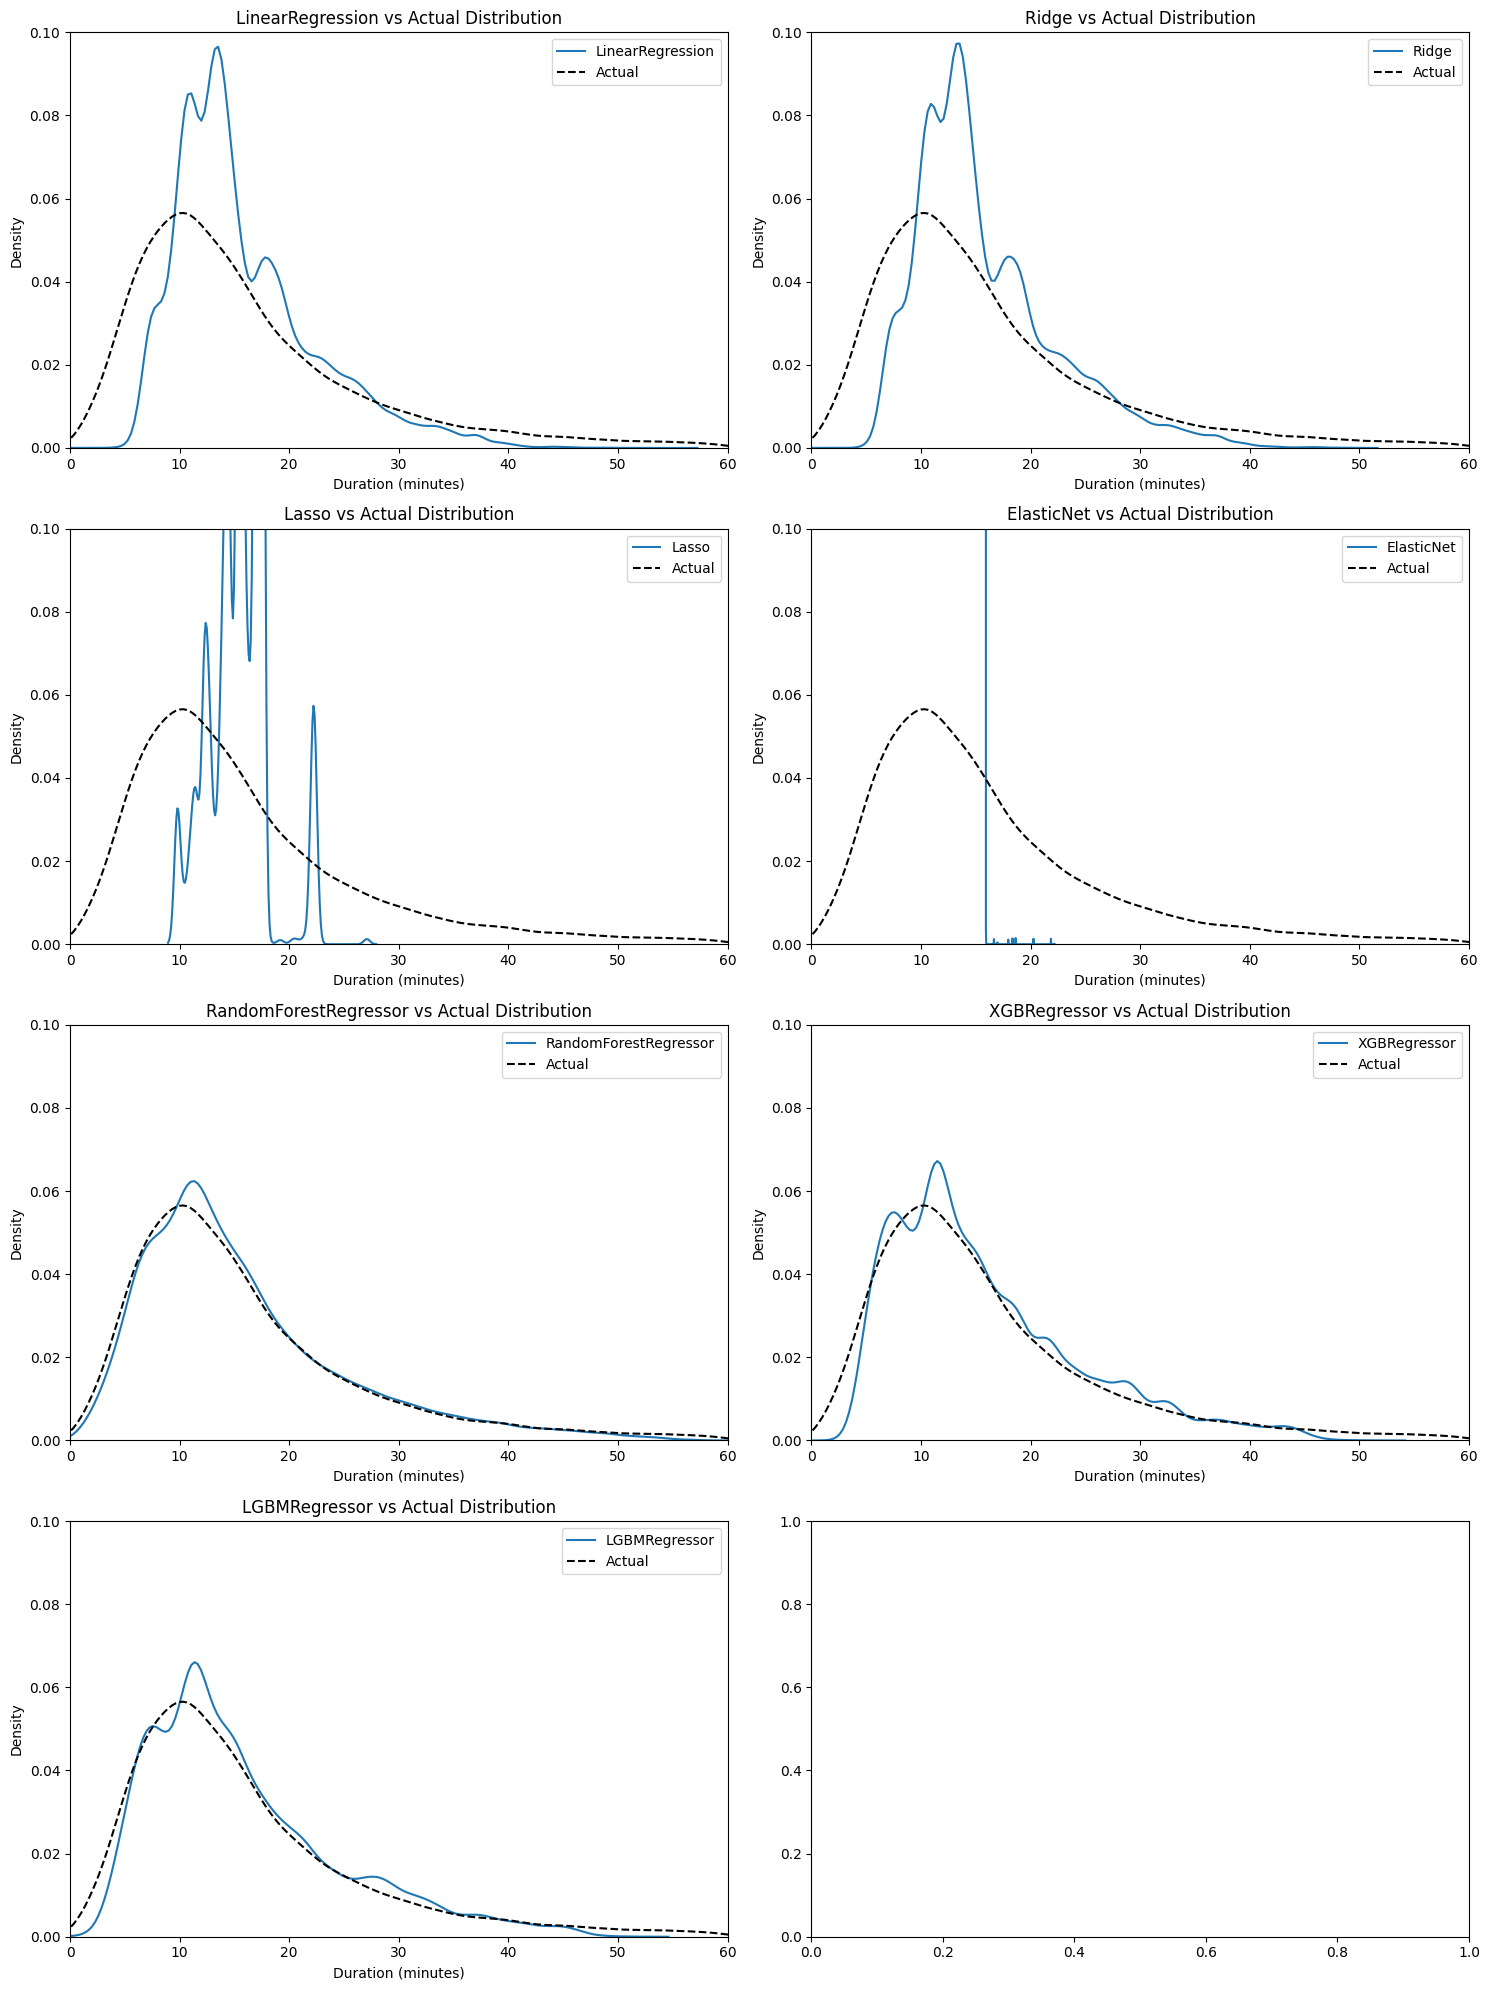

In [18]:
# Let's plot the predictions of different models
import matplotlib.pyplot as plt
import seaborn as sns

fig, axs = plt.subplots(4, 2, figsize=(15, 20))  # 4x2 grid (adjust as needed)
axs = axs.ravel()

for i, (model_name, y_pred) in enumerate(model_predictions.items()):
    sns.kdeplot(y_pred, label=model_name, ax=axs[i])
    sns.kdeplot(y_train, label='Actual', color='black', linestyle='--', ax=axs[i])
    axs[i].set_xlim(0, 60)
    axs[i].set_ylim(0, 0.1)
    axs[i].set_title(f'{model_name} vs Actual Distribution')
    axs[i].set_xlabel('Duration (minutes)')
    axs[i].set_ylabel('Density')
    axs[i].legend()

plt.tight_layout()
plt.show()


From the graph, and the outputs - The Models, Random Forest Regressor, XGB Regressor, and LGBM Regressor, are quite close to the actual duration, and provided less rmse, turned out to be a best models in this case

### Let's take a look at the correlation coefficient, if we are in the right path

In [19]:
X_train.shape

(43692, 474)

In [20]:
#Let's find the correlation coefficient between trip distance and duration
import numpy as np
correlation_matrix = np.corrcoef(df['trip_distance'], df['duration'])
correlation_coefficient = correlation_matrix[0, 1]
print(f"Correlation Coefficient between trip distance and duration: {correlation_coefficient}")

Correlation Coefficient between trip distance and duration: 0.004986424379554207


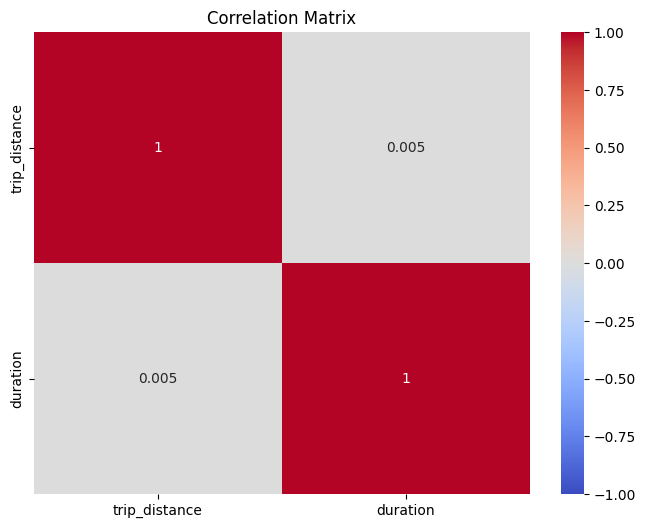

In [21]:
# Correlation coefficient using heatmap in sns
plt.figure(figsize=(8, 6))
correlation_matrix = df[['trip_distance', 'duration']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()

### Let's try with Deep Learning Models using Pytorch, and Tensorflow

In [22]:
%pip install torch

You should consider upgrading via the '/Users/raghulgopal/Desktop/MLOPs Dev/.venv/bin/python -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [23]:
import torch.nn as nn
import torch.optim as optim

In [24]:
%pip uninstall tensorflow -y
%pip install tensorflow
%pip uninstall tensorflow-metal -y
%pip install tensorflow-metal
%pip install tensorflow-macos


Found existing installation: tensorflow 2.16.2
Uninstalling tensorflow-2.16.2:
  Successfully uninstalled tensorflow-2.16.2
Note: you may need to restart the kernel to use updated packages.
  Using cached tensorflow-2.20.0-cp39-cp39-macosx_12_0_arm64.whl (200.4 MB)
  Using cached protobuf-6.32.1-cp39-abi3-macosx_10_9_universal2.whl (426 kB)
  Using cached tensorboard-2.20.0-py3-none-any.whl (5.5 MB)
ERROR: Could not install packages due to an OSError: [Errno 2] No such file or directory: '/Users/raghulgopal/Desktop/MLOPs Dev/.venv/lib/python3.9/site-packages/ml_dtypes-0.5.3.dist-info/METADATA'

You should consider upgrading via the '/Users/raghulgopal/Desktop/MLOPs Dev/.venv/bin/python -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.
Found existing installation: tensorflow-metal 1.2.0
Uninstalling tensorflow-metal-1.2.0:
  Successfully uninstalled tensorflow-metal-1.2.0
Note: you may need to restart the kernel to use updated packa

In [25]:
model_pytorch  = nn.Sequential(
    nn.Linear(X_train.shape[1], 64),
    nn.ReLU(),
    nn.Linear(64, 32),
    nn.ReLU(),
    nn.Linear(32, 1)
)

loss_fn = nn.MSELoss()
optimizer = optim.Adam(model_pytorch.parameters(), lr=0.001)

In [26]:
%pip install tqdm

You should consider upgrading via the '/Users/raghulgopal/Desktop/MLOPs Dev/.venv/bin/python -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [27]:
X_train

<43692x474 sparse matrix of type '<class 'numpy.float64'>'
	with 131076 stored elements in Compressed Sparse Row format>

In [ ]:
import torch
import tqdm
import numpy as np

# Training the model
N_EPOCHS = 10
BATCH_SIZE = 10
batch_start = torch.arange(0, X_train.shape[0], BATCH_SIZE)

# Store the best epoch
loss_history = []
y_pred_history = []
best_loss = float('inf')
best_epoch = -1
best_weights = None

# Convert X_train and y_train to tensors
if hasattr(X_train, "toarray"):
    X_tensor = torch.tensor(X_train.toarray(), dtype=torch.float32)
else:
    X_tensor = torch.tensor(X_train.shape[0], dtype=torch.float32)
y_tensor = torch.tensor(y_train, dtype=torch.float32).reshape(-1, 1)

for epoch in range(N_EPOCHS):
    model_pytorch.train()
    with tqdm.tqdm(batch_start, desc=f"Epoch {epoch + 1}/{N_EPOCHS}") as pbar:
        pbar.set_description(f"Epoch {epoch + 1}/{N_EPOCHS}")
        for start in pbar:
            # Take a batch of data
            X_batch = X_tensor[start:start + BATCH_SIZE]
            y_batch = y_tensor[start:start + BATCH_SIZE]
            # Forward pass
            y_pred = model_pytorch(X_batch)
            loss = loss_fn(y_pred, y_batch)
            # Backward pass and optimization
            optimizer.zero_grad()
            loss.backward()
            #Update the weights
            optimizer.step()
            #print progress
            pbar.set_postfix(mse=float(loss))
    # Evaluate accuracy at the end of each epoch
    model_pytorch.eval()
    with torch.no_grad():
        y_pred = model_pytorch(X_tensor)
        y_pred_history.append(y_pred.numpy())
        epoch_loss = loss_fn(y_pred, y_tensor).item()
        loss_history.append(epoch_loss)
        print(f"Epoch {epoch + 1}, MSE: {epoch_loss}")
        # Save the best model
        if epoch_loss < best_loss:
            best_loss = epoch_loss
            best_epoch = epoch + 1
            best_weights = model_pytorch.state_dict()

# Restore the best weights after training
if best_weights is not None:
    model_pytorch.load_state_dict(best_weights)
    print(f"Best model restored from epoch {best_epoch} with MSE: {best_loss}")
    print("MSE of the best model: %.2f" %best_loss)
    print("RMSE of the best model: %.2f" %np.sqrt(best_loss))


In [56]:
len(y_pred)

43692

In [55]:
# Finding the prediction history and store it in a variable
y_pred = []
for i in range(len(y_train)):
    y_pred.append(float(y_pred_history[4][i].astype(float)))# Pushing only the epch 5 predictions

/var/folders/fc/rs0n1nb14hgc3v3qh9h2rvf40000gn/T/ipykernel_2931/1776648840.py:4: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  y_pred.append(float(y_pred_history[4][i].astype(float)))# Pushing only the epch 5 predictions


43692
43692


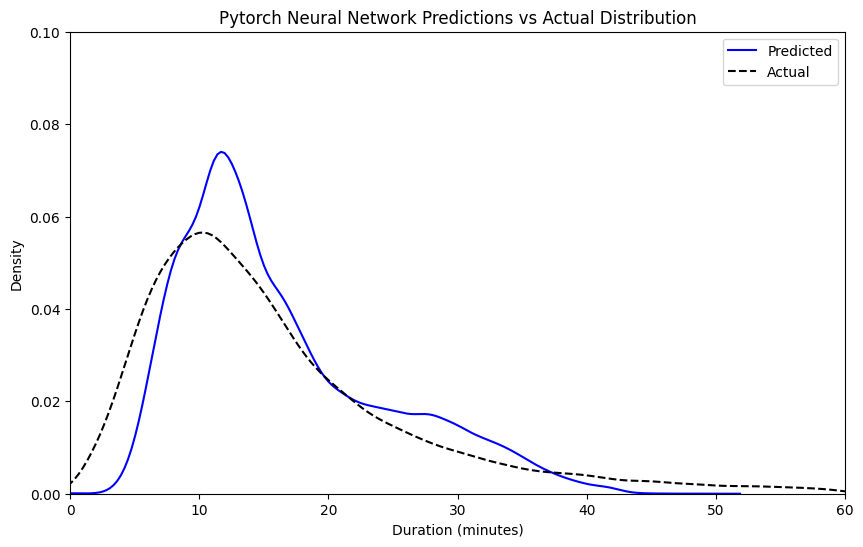

In [57]:
print(len(y_pred))
print(len(y_train))
# Plotting the predictions
plt.figure(figsize=(10, 6))
sns.kdeplot(y_pred, label='Predicted', color='blue')
sns.kdeplot(y_train, label='Actual', color='black', linestyle='--')
plt.xlim(0, 60)
plt.ylim(0, 0.1)
plt.title('Pytorch Neural Network Predictions vs Actual Distribution')
plt.xlabel('Duration (minutes)')
plt.ylabel('Density')
plt.legend()
plt.show()

In [58]:
import tensorflow as tf

/Users/raghulgopal/Desktop/MLOPs Dev/.venv/lib/python3.9/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


In [ ]:
# Model Training in tensorflow
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Input, Dropout, Activation
from keras.optimizers import Adam

In [60]:
model = Sequential()
model.add(Input(shape=(X_train.shape[1],)))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1))
model.compile(optimizer=Adam(learning_rate=0.001), loss='mse')
y_pred_history = model.fit(X_train, y_train, epochs=10, batch_size=10)

2025-09-27 20:55:46.782019: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M2
2025-09-27 20:55:46.784846: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 16.00 GB
2025-09-27 20:55:46.784891: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 5.33 GB
2025-09-27 20:55:46.785489: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2025-09-27 20:55:46.786216: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


Epoch 1/10


2025-09-27 20:55:54.660439: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.


4370/4370 ━━━━━━━━━━━━━━━━━━━━ 371s 80ms/step - loss: 8114465.0000
Epoch 2/10
4370/4370 ━━━━━━━━━━━━━━━━━━━━ 377s 86ms/step - loss: 1971561.7500
Epoch 3/10
4370/4370 ━━━━━━━━━━━━━━━━━━━━ 441s 101ms/step - loss: 2039011.8750
Epoch 4/10
1935/4370 ━━━━━━━━━━━━━━━━━━━━ 2:51 70ms/step - loss: 1172218.2500

KeyboardInterrupt: 